In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import joblib
import warnings
warnings.filterwarnings('ignore')

In [2]:
fl_train=pd.read_csv("Data_Train.csv")
#importing the train and test file


In [3]:
fl_test = pd.read_csv("Test_set.csv")


# Exploratory Data Analysis

In [4]:
fl_train

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [5]:
fl_train.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

we can see that there is only '1' null value in the 'Route' and 'Total_Stops'. so dropping them will not effect the data

In [6]:
fl_train.dropna(inplace=True)

In [7]:
fl_train.isnull().sum() # crosschecking

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [8]:
fl_train.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
fl_test.isnull().sum() # checking for null values in test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

we can see that there are no null values in test data

In [10]:
fl_train.dtypes

Airline            object
Date_of_Journey    object
Source             object
Destination        object
Route              object
Dep_Time           object
Arrival_Time       object
Duration           object
Total_Stops        object
Additional_Info    object
Price               int64
dtype: object

we can see that except for price (which is our target variable), all are object data type. 

Also we can see that,  

1. we need to convert 'Date_of_Journey' into timestamp i.e day and month (year is same i.e 2019, so no need of year)

2. convert 'Dep_Time', 'Arrival_Time' and 'Duration' into hours and minutes

In [11]:
fl_train['Date_of_Journey']= pd.to_datetime(fl_train['Date_of_Journey'])

fl_train['journeymonth'] = fl_train['Date_of_Journey'].dt.month
fl_train['journeyday'] = fl_train['Date_of_Journey'].dt.day

# we can drop 'Date_of_Journey' as we have all the information in 'journeymonth' and 'journeyday'

fl_train.drop('Date_of_Journey',axis=1,inplace=True)

In [12]:
fl_train['Dep_Time']= pd.to_datetime(fl_train['Dep_Time'])

fl_train['dephour'] = fl_train['Dep_Time'].dt.hour
fl_train['depmin'] = fl_train['Dep_Time'].dt.minute

# similarl to 'Date_of_Journey' we can drop 'Dep_Time'  as we have all the information in 'journeymonth' and 'journeyday'

fl_train.drop('Dep_Time',axis=1,inplace=True)

In [13]:
fl_train['Arrival_Time']= pd.to_datetime(fl_train['Arrival_Time'])

fl_train['Arrivalhour'] = fl_train['Arrival_Time'].dt.hour
fl_train['Arrivalmin'] = fl_train['Arrival_Time'].dt.minute

# similar to 'Date_of_Journey' we can drop 'Arrival_Time'  as we have all the information in 'journeymonth' and 'journeyday'

fl_train.drop('Arrival_Time',axis=1,inplace=True)

In [14]:
fl_train['Durationhours'] = fl_train['Duration'].str.split(" ").str[0]
fl_train['Durationminutes'] = fl_train['Duration'].str.split(" ").str[1]
fl_train['Durationminutes'] =fl_train['Durationminutes'].replace(np.nan, '0m')
fl_train['Durationhours']=fl_train['Durationhours'].str.extract('(\d+)').astype(int)
fl_train['Durationminutes']=fl_train['Durationminutes'].str.extract('(\d+)').astype(int)
fl_train.drop('Duration',axis=1,inplace=True)


In [15]:
fl_train.dtypes

Airline            object
Source             object
Destination        object
Route              object
Total_Stops        object
Additional_Info    object
Price               int64
journeymonth        int64
journeyday          int64
dephour             int64
depmin              int64
Arrivalhour         int64
Arrivalmin          int64
Durationhours       int32
Durationminutes     int32
dtype: object

In [16]:
fl_train.isnull().sum()

Airline            0
Source             0
Destination        0
Route              0
Total_Stops        0
Additional_Info    0
Price              0
journeymonth       0
journeyday         0
dephour            0
depmin             0
Arrivalhour        0
Arrivalmin         0
Durationhours      0
Durationminutes    0
dtype: int64

In [17]:
fl_train['Additional_Info'].value_counts()

No info                         8344
In-flight meal not included     1982
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

we can see that there there most of the columns are having no info, therefore we can drop 'Additional_Info'

we can also drop 'Route' as 'Route' and 'Total_Stops' provide the same information

In [18]:
fl_train.drop(['Additional_Info','Route'],axis=1,inplace=True)

In [19]:
fl_train

,Airline,Source,Destination,Total_Stops,Price,journeymonth,journeyday,dephour,depmin,Arrivalhour,Arrivalmin,Durationhours,Durationminutes
0,IndiGo,Banglore,New Delhi,non-stop,3897,3,24,22,20,1,10,2,50
1,Air India,Kolkata,Banglore,2 stops,7662,1,5,5,50,13,15,7,25
2,Jet Airways,Delhi,Cochin,2 stops,13882,9,6,9,25,4,25,19,0
3,IndiGo,Kolkata,Banglore,1 stop,6218,12,5,18,5,23,30,5,25
4,IndiGo,Banglore,New Delhi,1 stop,13302,1,3,16,50,21,35,4,45
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,Kolkata,Banglore,non-stop,4107,9,4,19,55,22,25,2,30
10679,Air India,Kolkata,Banglore,non-stop,4145,4,27,20,45,23,20,2,35
10680,Jet Airways,Banglore,Delhi,non-stop,7229,4,27,8,20,11,20,3,0
10681,Vistara,Banglore,New Delhi,non-stop,12648,1,3,11,30,14,10,2,40


In [20]:
fl_train.dtypes

Airline            object
Source             object
Destination        object
Total_Stops        object
Price               int64
journeymonth        int64
journeyday          int64
dephour             int64
depmin              int64
Arrivalhour         int64
Arrivalmin          int64
Durationhours       int32
Durationminutes     int32
dtype: object

Target variable

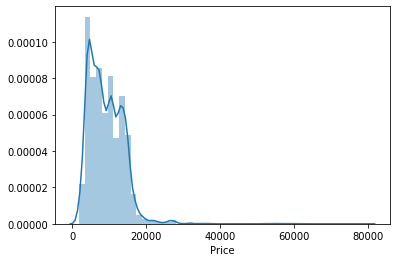

In [21]:
sns.distplot(fl_train['Price'])
plt.show()

we can see that the data is left skewed

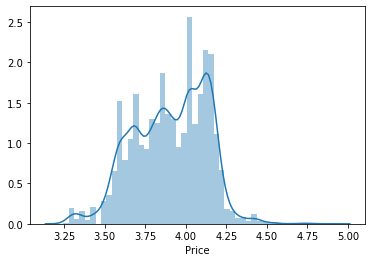

In [22]:
sns.distplot(np.log10(fl_train['Price']))
plt.show()

After log transformation it looks better

# Analysing Target variable with Independent variables

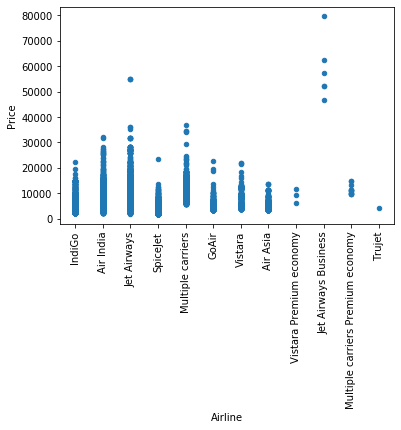

In [23]:
fl_train.plot(x ='Airline', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see that the price of Jet airways bussiness flights are the highest

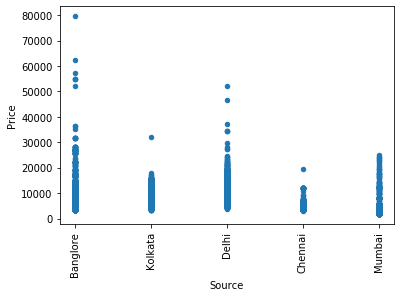

In [24]:
fl_train.plot(x ='Source', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see that the the price is highest where source is Bangalore

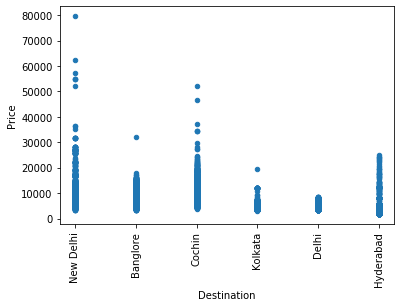

In [25]:
fl_train.plot(x ='Destination', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see that the the price is highest where Destination is New Delhi

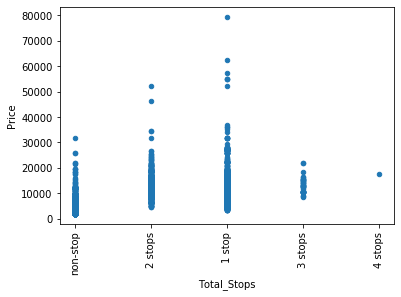

In [26]:
fl_train.plot(x ='Total_Stops', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see the prices is highest with 1 stop and lowest with non-stop

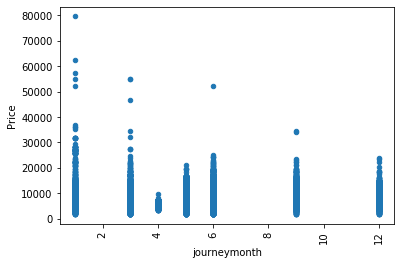

In [27]:
fl_train.plot(x ='journeymonth', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see that the prices are high during january month

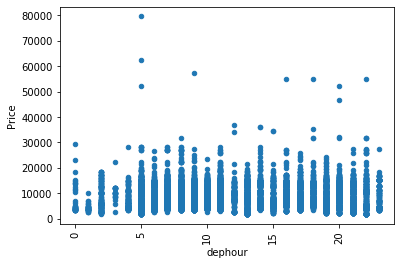

In [28]:
fl_train.plot(x ='dephour', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see that the prices are more during the 5th hour

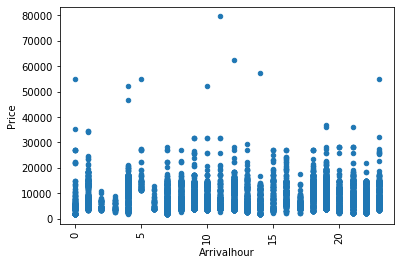

In [29]:
fl_train.plot(x ='Arrivalhour', y='Price', kind = 'scatter')
plt.xticks(rotation=90)
plt.show()

we can see that the prices are more during the 11th hour

# Label Encoding

Converting Categorical Variables to numerical

In [30]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
fl_train['Airline']=label.fit_transform(fl_train['Airline'])
fl_train['Source']=label.fit_transform(fl_train['Source'])
fl_train['Destination']=label.fit_transform(fl_train['Destination'])

In [31]:
fl_train.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [32]:
fl_train.corr() # checking the correlation

,Airline,Source,Destination,Total_Stops,Price,journeymonth,journeyday,dephour,depmin,Arrivalhour,Arrivalmin,Durationhours,Durationminutes
Airline,1.000000,-0.013397,0.018446,-0.199396,-0.039565,-0.007900,0.031118,-0.035269,-0.059922,-0.007567,-0.071092,-0.158213,-0.027973
Source,-0.013397,1.000000,-0.592576,0.192840,0.015999,0.063052,0.007563,0.059047,-0.056998,0.025635,0.021040,0.166225,-0.145235
Destination,0.018446,-0.592576,1.000000,-0.295476,-0.071122,-0.105035,-0.052102,-0.072997,0.127931,-0.039729,0.017196,-0.258401,0.061203
Total_Stops,-0.199396,0.192840,-0.295476,1.000000,0.603897,0.065495,-0.024136,-0.061476,-0.002618,0.038140,-0.106940,0.740049,-0.136749
Price,-0.039565,0.015999,-0.071122,0.603897,1.000000,0.010705,-0.165448,0.006799,-0.024458,0.024244,-0.086155,0.508902,-0.124899
journeymonth,-0.007900,0.063052,-0.105035,0.065495,0.010705,1.000000,-0.264896,0.028189,0.002136,-0.004329,-0.025786,0.055564,-0.018601
journeyday,0.031118,0.007563,-0.052102,-0.024136,-0.165448,-0.264896,1.000000,-0.002301,-0.016433,-0.002176,-0.021423,-0.038026,-0.007677
dephour,-0.035269,0.059047,-0.072997,-0.061476,0.006799,0.028189,-0.002301,1.000000,-0.024745,0.005180,0.067911,0.002903,-0.023723
depmin,-0.059922,-0.056998,0.127931,-0.002618,-0.024458,0.002136,-0.016433,-0.024745,1.000000,0.043122,-0.017597,-0.022030,0.092443
Arrivalhour,-0.007567,0.025635,-0.039729,0.038140,0.024244,-0.004329,-0.002176,0.005180,0.043122,1.000000,-0.154363,0.055300,-0.118315


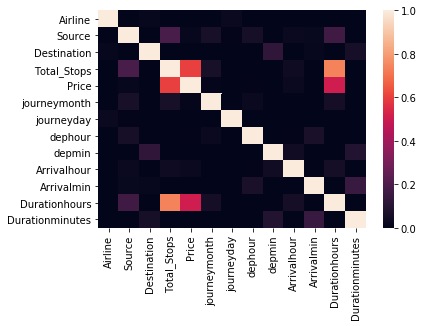

In [34]:
sns.heatmap(fl_train.corr(), vmin=0, vmax=1)
plt.show()

In [35]:
fl_train.corr()["Price"].sort_values(ascending=False) 
#identifying important features with target varible

Price              1.000000
Total_Stops        0.603897
Durationhours      0.508902
Arrivalhour        0.024244
Source             0.015999
journeymonth       0.010705
dephour            0.006799
depmin            -0.024458
Airline           -0.039565
Destination       -0.071122
Arrivalmin        -0.086155
Durationminutes   -0.124899
journeyday        -0.165448
Name: Price, dtype: float64

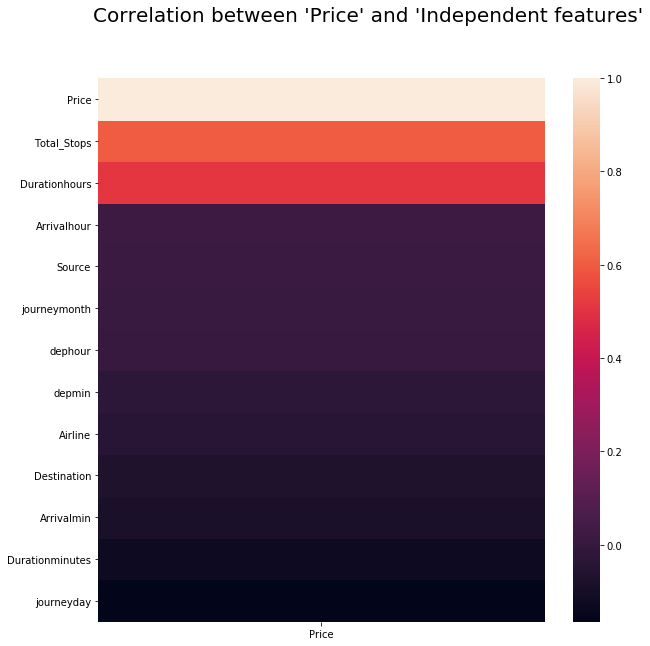

In [37]:
corr, b = plt.subplots(figsize=(10,10))
corr.suptitle("Correlation between 'Price' and 'Independent features'",fontsize=20)
b=sns.heatmap(fl_train.corr()[["Price"]].sort_values("Price"));
b.invert_yaxis()
#important features

# Splitting of train data into Independent and Target variables

In [38]:
ind=fl_train.drop("Price",axis=1)
tar=fl_train["Price"]
#splitting individual and target variable in ind and tar

# Data Modeling and prediciton

In [39]:
from sklearn.model_selection import train_test_split

In [40]:
# splitting data into training and testing 
ind_train, ind_test, tar_train, tar_test = train_test_split(ind, tar, test_size=0.33, random_state=42)

In [41]:
len(ind_train),len(ind_test),len( tar_train),len(tar_test)

(7156, 3526, 7156, 3526)

In [42]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import make_scorer
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.ensemble import RandomForestRegressor


In [64]:
knn = KNeighborsRegressor()
svm = SVR(gamma='scale')
dt = DecisionTreeRegressor()
rf = RandomForestRegressor()
lr= LinearRegression()

In [67]:
for m in [knn,svm,dt,rf,lr]:
    m.fit(ind_train,tar_train)
    train_predict = m.predict(ind_train)
    test_predict = m.predict(ind_test)
    print('for',m)
    print("RMSE :", np.sqrt(mean_squared_error(tar_train, train_predict)))
    print("RMSE :", np.sqrt(mean_squared_error(tar_test, test_predict)))
    print("Train R^2: ", r2_score(tar_train, train_predict))
    print("Test R^2: ", r2_score(tar_test, test_predict))

for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
RMSE : 2451.142375898564
RMSE : 2815.6435088155445
Train R^2:  0.7249734864158088
Test R^2:  0.6050588168437123
for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
RMSE : 4674.219061748165
RMSE : 4460.524630852682
Train R^2:  -0.00012805809081273267
Test R^2:  0.008828121932318744
for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
RMSE : 754.0500054988448

In [45]:
from sklearn.model_selection import cross_val_score
# function to get cross validation scores
def get_cv_scores(model):
    scores = cross_val_score(model,
                             ind_train,
                             tar_train,
                             cv=5,
                             scoring='r2')
    
    print('CV Mean: ', np.mean(scores))
    print('STD: ', np.std(scores))
    print('\n')

In [46]:
for i in [knn,svm,dt,rf,lr]:
    print('for',i)
    print(get_cv_scores(i))


for KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')
CV Mean:  0.5324440984693791
STD:  0.017963354428072554


None
for SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)
CV Mean:  -0.005158338672529017
STD:  0.012017165713833305


None
for DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')
CV Mean:  0.6787487214317924
STD:  0.02011501432651819


None
for RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criter

Therefore we can see that the model is behaving well with RandomForestRegressor

In [47]:
# To find the best parameters by using GridSearchCV to improve the model
from sklearn.model_selection import GridSearchCV

parameters={'criterion':['mse','mae'],'max_features': ['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(ind_train,tar_train)
print(clf.best_params_)
#best parameters

{'criterion': 'mse', 'max_features': 'sqrt'}


In [48]:
clf.best_score_

0.791115033418854

Using the RandomForestRegressor to predict the given test data

In [70]:
import joblib
joblib.dump(rf,'Flight Price Prediction.obj') #save the model as object file


['Flight Price Prediction.obj']

# Test data

In [49]:
fl_test.isnull().sum() # checking for null values in test data

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
dtype: int64

In [50]:
fl_test['Date_of_Journey']= pd.to_datetime(fl_test['Date_of_Journey'])

fl_test['journeymonth'] = fl_test['Date_of_Journey'].dt.month
fl_test['journeyday'] = fl_test['Date_of_Journey'].dt.day

# we can drop 'Date_of_Journey' as we have all the information in 'journeymonth' and 'journeyday'

fl_test.drop('Date_of_Journey',axis=1,inplace=True)

fl_test['Dep_Time']= pd.to_datetime(fl_test['Dep_Time'])

fl_test['dephour'] = fl_test['Dep_Time'].dt.hour
fl_test['depmin'] = fl_test['Dep_Time'].dt.minute

# similarl to 'Date_of_Journey' we can drop 'Dep_Time'  as we have all the information in 'journeymonth' and 'journeyday'

fl_test.drop('Dep_Time',axis=1,inplace=True)


fl_test['Arrival_Time']= pd.to_datetime(fl_test['Arrival_Time'])

fl_test['Arrivalhour'] = fl_test['Arrival_Time'].dt.hour
fl_test['Arrivalmin'] = fl_test['Arrival_Time'].dt.minute

# similar to 'Date_of_Journey' we can drop 'Arrival_Time'  as we have all the information in 'journeymonth' and 'journeyday'

fl_test.drop('Arrival_Time',axis=1,inplace=True)


fl_test['Durationhours'] = fl_test['Duration'].str.split(" ").str[0]
fl_test['Durationminutes'] = fl_test['Duration'].str.split(" ").str[1]
fl_test['Durationhours']=fl_test['Durationhours'].str.extract('(\d+)').astype(int)
fl_test['Durationminutes'] =fl_test['Durationminutes'].replace(np.nan, '0m')
fl_test['Durationminutes']=fl_test['Durationminutes'].str.extract('(\d+)').astype(int)








In [51]:
# similar to 'Date_of_Journey' we can drop 'Duration'  as we have all the information in 'Durationhours' and 'Durationminutes'
fl_test.drop('Duration',axis=1,inplace=True)


In [52]:
fl_test

,Airline,Source,Destination,Route,Total_Stops,Additional_Info,journeymonth,journeyday,dephour,depmin,Arrivalhour,Arrivalmin,Durationhours,Durationminutes
0,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,6,17,30,4,25,10,55
1,IndiGo,Kolkata,Banglore,CCU → MAA → BLR,1 stop,No info,12,5,6,20,10,20,4,0
2,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,In-flight meal not included,5,21,19,15,19,0,23,45
3,Multiple carriers,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,5,21,8,0,21,0,13,0
4,Air Asia,Banglore,Delhi,BLR → DEL,non-stop,No info,6,24,23,55,2,45,2,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2666,Air India,Kolkata,Banglore,CCU → DEL → BLR,1 stop,No info,6,6,20,30,20,25,23,55
2667,IndiGo,Kolkata,Banglore,CCU → BLR,non-stop,No info,3,27,14,20,16,55,2,35
2668,Jet Airways,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,21,50,4,25,6,35
2669,Air India,Delhi,Cochin,DEL → BOM → COK,1 stop,No info,6,3,4,0,19,15,15,15


In [53]:
fl_test['Additional_Info'].value_counts()

No info                         2148
In-flight meal not included      444
No check-in baggage included      76
Change airports                    1
Business class                     1
1 Long layover                     1
Name: Additional_Info, dtype: int64

we can see that there there most of the columns are having no info, therefore we can drop 'Additional_Info'

we can also drop 'Route' as 'Route' and 'Total_Stops' provide the same information

In [54]:
fl_test.drop(['Additional_Info','Route'],axis=1,inplace=True)

# Label Encoding

Converting Categorical Variables to numerical

In [55]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()
fl_test['Airline']=label.fit_transform(fl_test['Airline'])
fl_test['Source']=label.fit_transform(fl_test['Source'])
fl_test['Destination']=label.fit_transform(fl_test['Destination'])

In [56]:
fl_test.replace({"non-stop": 0, "1 stop": 1, "2 stops": 2, "3 stops": 3, "4 stops": 4}, inplace = True)

In [57]:
fl_test.head()

,Airline,Source,Destination,Total_Stops,journeymonth,journeyday,dephour,depmin,Arrivalhour,Arrivalmin,Durationhours,Durationminutes
0,4,2,1,1,6,6,17,30,4,25,10,55
1,3,3,0,1,12,5,6,20,10,20,4,0
2,4,2,1,1,5,21,19,15,19,0,23,45
3,6,2,1,1,5,21,8,0,21,0,13,0
4,0,0,2,0,6,24,23,55,2,45,2,50


In [68]:
test_predictions = rf.predict(fl_test)
test_predictions=pd.DataFrame(test_predictions)

In [69]:
test_predictions

,0
0,10394.891667
1,4350.370000
2,14952.865000
3,12969.925000
4,3721.180000
...,...
2666,10229.770000
2667,5239.390000
2668,16386.650000
2669,12603.510000
